# Open data analysis and model to predict the League of Legends World Championship (Python version)

## Formmating and preparing train and test data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#directory_changed = False ## un comment this only the first time this cell is run

if(directory_changed == False):
    current_path = os.getcwd()
    inputs_path = current_path + '/data'
    os.chdir(inputs_path)

train_file = 'train_data.csv'
test_file = 'test_data.csv'

directory_changed = True

In [2]:
train_df= pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

In [3]:
train_df.head()

,result,team,side,topwr_champ,jngwr_champ,midwr_champ,adcwr_champ,supwr_champ,topwr_player,jngwr_player,midwr_player,adcwr_player,supwr_player
0,1,Team WE,Blue,0.5000,0.4954,0.4928,0.5008,0.5318,0.581536,0.596491,0.656250,0.619048,1.000000
1,0,Lyon Gaming,Red,0.5000,0.5046,0.5072,0.4992,0.4682,0.545455,0.777778,0.500000,0.000000,0.600000
2,1,Cloud9,Blue,0.4391,0.4966,0.5562,0.5008,0.4786,0.700000,0.563228,0.733333,0.555556,0.636364
3,0,Team oNe Esports,Red,0.5609,0.5034,0.4438,0.4992,0.5214,0.500000,0.500000,0.000000,0.000000,0.000000
4,0,Gambit Esports,Blue,0.4837,0.4750,0.3970,0.4912,0.4950,0.333333,0.588235,0.500000,0.500000,0.500000


In [4]:
test_df.head()

,result,team,side,topwr_champ,jngwr_champ,midwr_champ,adcwr_champ,supwr_champ,topwr_player,jngwr_player,midwr_player,adcwr_player,supwr_player
0,0,Longzhu Gaming,Blue,0.4809,0.5204,0.4417,0.4912,0.4975,0.875000,0.333333,0.285714,0.500000,0.660000
1,1,Samsung Galaxy,Red,0.5191,0.4796,0.5583,0.5088,0.5025,0.529412,0.750000,1.000000,0.461538,0.750000
2,0,Longzhu Gaming,Blue,0.5000,0.5204,0.5003,0.4878,0.4876,0.508497,0.333333,0.666667,0.500000,0.357143
3,1,Samsung Galaxy,Red,0.5000,0.4796,0.4997,0.5122,0.5124,0.666667,0.750000,0.695652,0.461538,0.500000
4,1,Samsung Galaxy,Blue,0.4853,0.5222,0.4984,0.5122,0.5497,0.666667,0.750000,0.625000,0.461538,0.500000


We need to convert the *team* and *side* variables to cathegorical variables

In [8]:
train_df["team"] = train_df["team"].astype("category")
train_df["side"] = train_df["side"].astype("category")

In [17]:
teams = train_df["team"].unique()

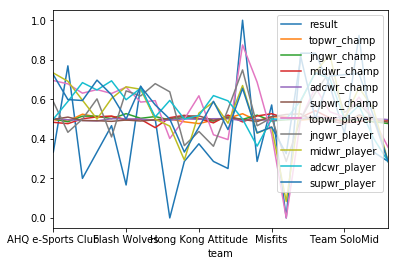

In [16]:
mean_df = train_df.groupby('team').mean()
%matplotlib inline
plt.figure(); mean_df.plot(); plt.legend(loc='best')

We are going to substitute the *team* feature by the *region* feature. There are 12 different
regions where each team can play. Thus we are reducing the dimensionality of *team* from 24
to 12.

Regions and teams available at: https://lol.gamepedia.com/2017_Season_World_Championship

The regions of teams that were not classified to the Groups stage during the Play-in stage are included all
in the region catheogry "Other".


In [19]:
for team in teams:
    print(team)

Team WE
Lyon Gaming
Cloud9
Team oNe Esports
Gambit Esports
Dire Wolves
Young Generation
Kaos Latin Gamers
Rampage
Hong Kong Attitude
Fnatic
Fenerbahce Esports
Royal Never Give Up
G2 Esports
Samsung Galaxy
Longzhu Gaming
Immortals
Gigabyte Marines
SK Telecom T1
EDward Gaming
AHQ e-Sports Club
Flash Wolves
Team SoloMid
Misfits


In [23]:
team2region = {
    'Team WE': 'CN',
    'Lyon Gaming': 'Other',
    'Cloud9': 'NA',
    'Team oNe Esports': 'Other',
    'Gambit Esports': 'Other',
    'Dire Wolves': 'Other',
    'Young Generation': 'Other',
    'Kaos Latin Gamers': 'Other',
    'Rampage': 'Other',
    'Hong Kong Attitude': 'TW',
    'Fnatic': 'EU',
    'Fenerbahce Esports': 'TR',
    'Royal Never Give Up': 'CN',
    'G2 Esports': 'EU',
    'Samsung Galaxy': 'KR',
    'Longzhu Gaming': 'KR',
    'Immortals': 'NA',
    'Gigabyte Marines': 'SEA',
    'SK Telecom T1': 'KR',
    'EDward Gaming': 'CN',
    'AHQ e-Sports Club': 'TW',
    'Flash Wolves': 'TW',
    'Team SoloMid': 'NA',
    'Misfits': 'EU'
}

In [24]:
team2region['Team WE']

'CN'

In [50]:
regions = train_df.replace({"team": team2region})['team']
train_df["region"] = regions
test_df["region"] = regions

In [51]:
train_df["region"].head()

0       CN
1    Other
2       NA
3    Other
4    Other
Name: region, dtype: object

In [52]:
features = ['result', 'side', 'region', 'topwr_player', 'jngwr_player',
            'midwr_player','adcwr_player','supwr_player' ]
train_df2 = train_df.loc[:,features]
test_df2 = test_df.loc[:,features]

In [53]:
train_df2.head()

,result,side,region,topwr_player,jngwr_player,midwr_player,adcwr_player,supwr_player
0,1,Blue,CN,0.581536,0.596491,0.656250,0.619048,1.000000
1,0,Red,Other,0.545455,0.777778,0.500000,0.000000,0.600000
2,1,Blue,NA,0.700000,0.563228,0.733333,0.555556,0.636364
3,0,Red,Other,0.500000,0.500000,0.000000,0.000000,0.000000
4,0,Blue,Other,0.333333,0.588235,0.500000,0.500000,0.500000


In [54]:
test_df2.head()

,result,side,region,topwr_player,jngwr_player,midwr_player,adcwr_player,supwr_player
0,0,Blue,CN,0.875000,0.333333,0.285714,0.500000,0.660000
1,1,Red,Other,0.529412,0.750000,1.000000,0.461538,0.750000
2,0,Blue,NA,0.508497,0.333333,0.666667,0.500000,0.357143
3,1,Red,Other,0.666667,0.750000,0.695652,0.461538,0.500000
4,1,Blue,Other,0.666667,0.750000,0.625000,0.461538,0.500000


## Visualizing the train data

In [60]:
region_stats = train_df2.groupby('region').mean()
region_stats

,result,topwr_player,jngwr_player,midwr_player,adcwr_player,supwr_player
region,,,,,,
CN,0.760000,0.593654,0.565693,0.604474,0.593374,0.743118
EU,0.607143,0.546795,0.602762,0.570676,0.586214,0.593561
KR,0.833333,0.690911,0.708068,0.744900,0.646011,0.624381
NA,0.555556,0.567959,0.441060,0.614691,0.573777,0.629096
Other,0.225000,0.453876,0.453963,0.426052,0.458410,0.442271
SEA,0.285714,0.500000,0.365655,0.293040,0.500000,0.333333
TR,0.466667,0.629562,0.409790,0.604393,0.693529,0.622436
TW,0.300000,0.654068,0.544221,0.630979,0.536577,0.550572


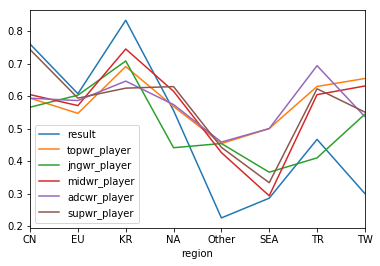

In [67]:
%matplotlib inline
region_stats.plot(); plt.legend(loc='best')

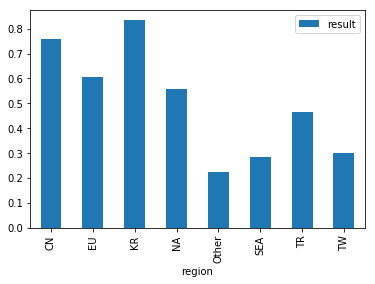

In [69]:
region_stats['result'].plot(kind = 'bar'); plt.legend(loc='best')

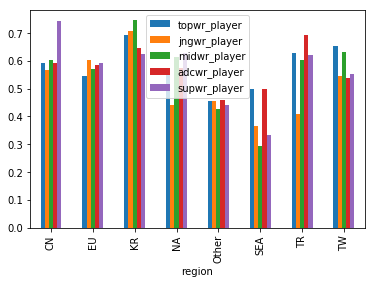

In [70]:
region_stats.iloc[:,1:].plot(kind = 'bar'); plt.legend(loc='best')

## Binary logistic regression model

Refs for the implementation of the model in python: http://nbviewer.jupyter.org/gist/justmarkham/6d5c061ca5aee67c4316471f8c2ae976

In [84]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [86]:
features

['result',
 'side',
 'region',
 'topwr_player',
 'jngwr_player',
 'midwr_player',
 'adcwr_player',
 'supwr_player']

In [88]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('result ~ side + region + topwr_player + jngwr_player + \
                           midwr_player + adcwr_player + supwr_player',
                  train_df2, return_type="dataframe")
print(X.columns)




Index(['Intercept', 'side[T.Red]', 'region[T.EU]', 'region[T.KR]',
       'region[T.NA]', 'region[T.Other]', 'region[T.SEA]', 'region[T.TR]',
       'region[T.TW]', 'topwr_player', 'jngwr_player', 'midwr_player',
       'adcwr_player', 'supwr_player'],
      dtype='object')


In [92]:
#The column names for the dummy variables are ugly, so let's rename those.
# fix column names of X
X = X.rename(columns = {
    'side[T.Red]': 'side', 
    'region[T.EU]': 'EU',
    'region[T.KR]': 'KR',
    'region[T.NA]': 'NA', 
    'region[T.Other]': 'Other', 
    'region[T.SEA]': 'SEA', 
    'region[T.TR]': 'TR',
    'region[T.TW]': 'TW'
})

In [90]:
X.head()

,Intercept,side,EU,KR,NA,Other,SEA,TR,TW,topwr_player,jngwr_player,midwr_player,adcwr_player,supwr_player
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.581536,0.596491,0.656250,0.619048,1.000000
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.545455,0.777778,0.500000,0.000000,0.600000
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.700000,0.563228,0.733333,0.555556,0.636364
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.500000,0.500000,0.000000,0.000000,0.000000
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.588235,0.500000,0.500000,0.500000


In [93]:
y.head()

,result
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


We also need to flatten y into a 1-D array, so that scikit-learn will properly understand it as the response variable.



In [96]:
# flatten y into a 1-D array
y = np.ravel(y)
y

array([ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,
        0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
        1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
        0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
        0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,
        0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.])

In [97]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.76666666666666672

77% accuracy seems good, but what's the null error rate?



In [98]:
# what percentage had affairs?
y.mean()

0.5

50 % < 77% (quite good??)

Let's examine the coefficients to see what we learn.

In [107]:
# examine the coefficients
pd.DataFrame({'1.feature': X.columns, '2. coeff': np.ravel(np.transpose(model.coef_))})

,1.feature,2. coeff
0,Intercept,-1.446238
1,side,-0.297452
2,EU,-0.089020
3,KR,0.305030
4,NA,-0.236521
5,Other,-1.079941
6,SEA,-0.209422
7,TR,-0.585949
8,TW,-1.239724
9,topwr_player,1.264765


Playing in the red side correspond to a decrease in the likelihood of winning a game.

The only region that does not decrease the likelyhood is KR (Korea). NA, SEA and EU decrease likelyhood but less than the others (EU seems to be kind of neutral).


## Model evaluation using a validation set

Warning: the split should have done by considering that train and test data is going by pairs (what we do below
is not considering this, but we considered this in the main project in R: https://github.com/dsalgador/LeagueOfLegends_Project)

In [108]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print(predicted)

[ 1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.  0.  0.  0.  1.  1.  1.
  0.  1.  1.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  1.  1.
  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  1.]


In [113]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print(probs);

[[ 0.32132497  0.67867503]
 [ 0.24440075  0.75559925]
 [ 0.46232006  0.53767994]
 [ 0.38780482  0.61219518]
 [ 0.39442535  0.60557465]
 [ 0.68971447  0.31028553]
 [ 0.28966225  0.71033775]
 [ 0.40099896  0.59900104]
 [ 0.36560629  0.63439371]
 [ 0.12554885  0.87445115]
 [ 0.58416623  0.41583377]
 [ 0.12869238  0.87130762]
 [ 0.64076556  0.35923444]
 [ 0.52290159  0.47709841]
 [ 0.54523583  0.45476417]
 [ 0.18820362  0.81179638]
 [ 0.46957359  0.53042641]
 [ 0.36772708  0.63227292]
 [ 0.52112736  0.47887264]
 [ 0.20716181  0.79283819]
 [ 0.06678398  0.93321602]
 [ 0.36327631  0.63672369]
 [ 0.88486178  0.11513822]
 [ 0.647348    0.352652  ]
 [ 0.70751853  0.29248147]
 [ 0.53720729  0.46279271]
 [ 0.40502075  0.59497925]
 [ 0.46537218  0.53462782]
 [ 0.42686085  0.57313915]
 [ 0.74179557  0.25820443]
 [ 0.56487166  0.43512834]
 [ 0.92628575  0.07371425]
 [ 0.77298378  0.22701622]
 [ 0.72795567  0.27204433]
 [ 0.3470521   0.6529479 ]
 [ 0.44810196  0.55189804]
 [ 0.36977356  0.63022644]
 

As you can see, the classifier is predicting a 1 (having WON the game) any time the probability in the second column is greater than 0.5.

Now let's generate some evaluation metrics.

In [117]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.666666666667
0.792582417582


The accuracy is 67%, 10% less than we experienced when training and predicting on the same data.

We can also see the confusion matrix and a classification report with other metrics.

In [118]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[15 11]
 [ 7 21]]
             precision    recall  f1-score   support

        0.0       0.68      0.58      0.62        26
        1.0       0.66      0.75      0.70        28

avg / total       0.67      0.67      0.66        54



## Model evaluation using  Cross-Validation

In [192]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[ 0.88888889  0.66666667  0.61111111  1.          0.66666667  0.61111111
  0.72222222  0.77777778  0.72222222  0.44444444]
0.711111111111


Looks good. It is performing at 71% accuracy (quite less than the 77% observed initially).



## Model predictions (data nor train nor test)

In [242]:
all_df2 = train_df2.append(test_df2, ignore_index = True)

In [243]:
y_real, X_real = dmatrices('result ~ side + region + topwr_player + jngwr_player + \
                           midwr_player + adcwr_player + supwr_player',
                  all_df2, return_type="dataframe")
#X_real.head()
X_real.head()
#model.predict_proba(test_df2.iloc[0,:])

,Intercept,side[T.Red],region[T.EU],region[T.KR],region[T.NA],region[T.Other],region[T.SEA],region[T.TR],region[T.TW],topwr_player,jngwr_player,midwr_player,adcwr_player,supwr_player
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.581536,0.596491,0.656250,0.619048,1.000000
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.545455,0.777778,0.500000,0.000000,0.600000
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.700000,0.563228,0.733333,0.555556,0.636364
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.500000,0.500000,0.000000,0.000000,0.000000
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.588235,0.500000,0.500000,0.500000


In [244]:
test_df2.iloc[0,:]

result                 0
side                Blue
region                CN
topwr_player       0.875
jngwr_player    0.333333
midwr_player    0.285714
adcwr_player         0.5
supwr_player        0.66
Name: 0, dtype: object

In [245]:
match1 = np.append(np.append([1],[0,0,0,0,0,0,0,0]), [test_df2.iloc[0,i] for i in  range(3,8) ])
match1


array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.875     ,
        0.33333333,  0.28571429,  0.5       ,  0.66      ])

In [246]:
match1.reshape(1, -1)

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.875     ,
         0.33333333,  0.28571429,  0.5       ,  0.66      ]])

In [247]:
model.predict_proba(match1.reshape(1, -1))

array([[ 0.40907708,  0.59092292]])

In [248]:
X_real.iloc[0,:].values.reshape(1, -1)

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.58153606,
         0.59649123,  0.65625   ,  0.61904762,  1.        ]])

In [249]:
model.predict_proba(X_real.iloc[180,:].values.reshape(1, -1))

array([[ 0.40907708,  0.59092292]])

In [250]:
model.predict(X_real) == y_real.values.reshape(1, -1)

array([[ True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True, False,  True,  True,  True,
         True,  True, False, False, False,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False, False,
         True,  True,  True, False,  True,  True, False, False, False,
         True,  True,  True,  True,  True, False,  True,  True,  True,
        False, False,  True,  True,  True,  True, False,  True,  True,
        False,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True, False,
      

In [251]:
np.sum( (model.predict(X_real) == y_real.values.reshape(1, -1)).astype(int) )/len(y_real)

0.69327731092436973

PREDICTION ACCURACY:   69%